In [10]:
from pandas import DataFrame
import tensorflow as tf

from neuralzoo.selector.random_selection import get_random_image_per_class
from neuralzoo.transformer.one_hot_encoder import one_encode_labels
from neuralzoo.visualization.image_loader import load_image, dataframe_per_labels



In [11]:
# NOTE legacy import from local pickles
# dataframe_train, target_train, dataframe_test, target_test = dataframes_from_cifar()
# target_train.head()
data = tf.keras.datasets.cifar10.load_data()

In [12]:
(dataframe_train, target_train), (dataframe_test, target_test) = data 
full_dataframe_train = DataFrame(data = {'image':[element for element in dataframe_train], 'label':[element[0] for element in target_train]})
full_dataframe_test = DataFrame(data = {'image':[element for element in dataframe_test], 'label':[element[0] for element in target_test]})

Image 0 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 1 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 2 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 3 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 4 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 5 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 6 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 7 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 8 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 9 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)


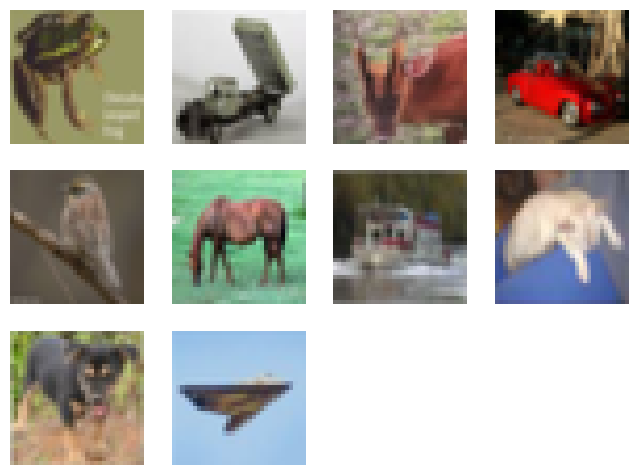

In [13]:
images = get_random_image_per_class(full_dataframe_train)
load_image(images)


In [14]:
full_dataframe_train['label'].value_counts()

label
6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
Name: count, dtype: int64

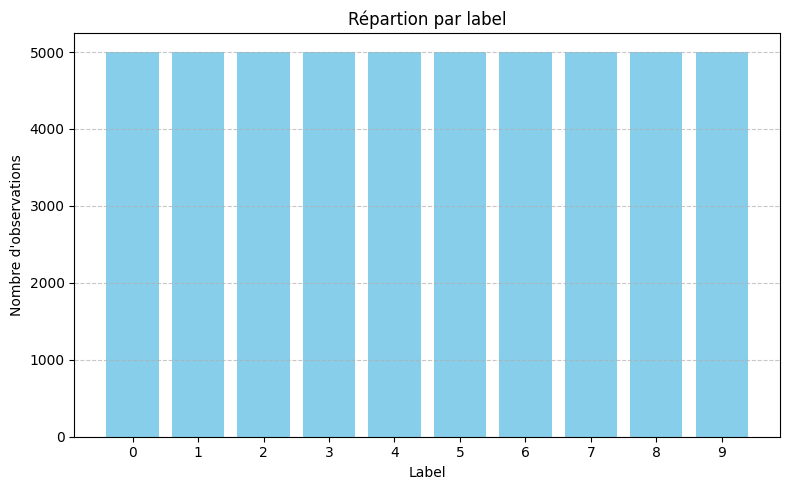

In [15]:
dataframe_per_labels(full_dataframe_train)

In [16]:
UNWANTED_LABELS = [0,1,8,9]
full_dataframe_train = full_dataframe_train[~full_dataframe_train['label'].isin(UNWANTED_LABELS)]
full_dataframe_train.reset_index(drop=True, inplace=True)
full_dataframe_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   30000 non-null  object
 1   label   30000 non-null  uint8 
dtypes: object(1), uint8(1)
memory usage: 263.8+ KB


Image 0 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 1 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 2 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 3 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 4 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)
Image 5 type: <class 'numpy.ndarray'>, shape: (32, 32, 3)


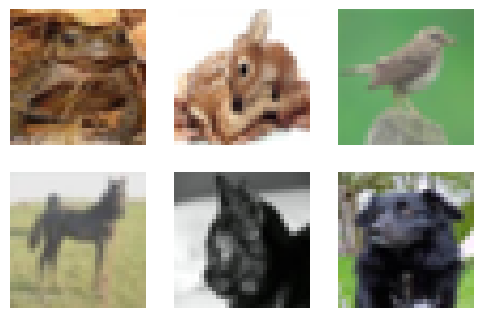

In [17]:
images = get_random_image_per_class(full_dataframe_train)
load_image(images)

In [18]:
#ONE HOT ENCODE LABELS
full_dataframe_train = one_encode_labels(full_dataframe_train, True)
full_dataframe_train

                                                   image  label
0      [[[59, 62, 63], [43, 46, 45], [50, 48, 43], [6...      6
1      [[[28, 25, 10], [37, 34, 19], [38, 35, 20], [4...      4
2      [[[164, 206, 84], [105, 140, 61], [118, 148, 1...      2
3      [[[28, 35, 39], [30, 34, 44], [33, 44, 47], [6...      7
4      [[[125, 125, 116], [110, 101, 91], [102, 90, 8...      3
...                                                  ...    ...
29995  [[[161, 166, 159], [172, 177, 170], [176, 181,...      5
29996  [[[226, 229, 235], [226, 229, 237], [231, 235,...      4
29997  [[[188, 195, 201], [186, 193, 200], [187, 194,...      2
29998  [[[145, 161, 194], [151, 166, 199], [156, 171,...      2
29999  [[[255, 245, 132], [254, 247, 134], [255, 249,...      6

[30000 rows x 2 columns]


,image,label_is_bird,label_is_cat,label_is_deer,label_is_dog,label_is_frog,label_is_horse
0,"[[[59, 62, 63], [43, 46, 45], [50, 48, 43], [6...",0.0,1.0,0.0,0.0,0.0,0.0
1,"[[[28, 25, 10], [37, 34, 19], [38, 35, 20], [4...",1.0,0.0,0.0,0.0,0.0,0.0
2,"[[[164, 206, 84], [105, 140, 61], [118, 148, 1...",0.0,0.0,0.0,0.0,1.0,0.0
3,"[[[28, 35, 39], [30, 34, 44], [33, 44, 47], [6...",0.0,0.0,0.0,1.0,0.0,0.0
4,"[[[125, 125, 116], [110, 101, 91], [102, 90, 8...",0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
29995,"[[[161, 166, 159], [172, 177, 170], [176, 181,...",0.0,0.0,0.0,0.0,0.0,1.0
29996,"[[[226, 229, 235], [226, 229, 237], [231, 235,...",1.0,0.0,0.0,0.0,0.0,0.0
29997,"[[[188, 195, 201], [186, 193, 200], [187, 194,...",0.0,0.0,0.0,0.0,1.0,0.0
29998,"[[[145, 161, 194], [151, 166, 199], [156, 171,...",0.0,0.0,0.0,0.0,1.0,0.0
